In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sri-lankan-dataset/sl_budget_app_demo_50k.csv
/kaggle/input/sri-lankan-dataset/sl_demo_50k.csv


In [55]:
# Path to your uploaded xlsx file
file_path = "/kaggle/input/sri-lankan-dataset/sl_budget_app_demo_50k.csv"

# Read the Excel file
df = pd.read_csv(file_path)

# Show first 5 rows
# df.head(50)

In [56]:
df

,Name,Gender,Age,Income (LKR Monthly),Education Level,Occupation,Marital Status,Number of Children,Location Type,Health Index,Exercise Frequency,Diet Quality Score,Credit Score,Car Ownership
0,Rajan de Alwis,Female,32,61733,Up to O/L,Salaried—Public,Divorced,0,Urban,80.264528,3-5/wk,73.80,602,0
1,Anitha Abeysekara,Male,36,52634,Up to O/L,Salaried—Private,Married,0,Suburban,76.315534,Daily,41.84,796,0
2,Nuwan Rajapaksha,Male,29,94745,Up to O/L,Salaried—Private,Married,0,Rural,69.726060,1-2/wk,54.02,628,0
3,Nandini Wijesinghe,Female,21,83331,Up to O/L,Self-Employed,Single,0,Rural,62.333490,NaN,45.48,613,0
4,Yogesh Abeysekara,Male,27,147316,A/L,Salaried—Private,Married,0,Rural,75.598882,1-2/wk,75.00,642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Oshadi Rathnayake,Female,39,37346,A/L,Self-Employed,Married,1,Suburban,75.867769,1-2/wk,75.96,710,0
49996,Meena Ilangasinghe,Male,16,103789,Bachelor,Self-Employed,Single,0,Urban,88.016857,Daily,83.63,766,0
49997,Amaya Sivakumar,Male,36,144593,Diploma/TVET,Small Business Owner,Married,2,Rural,65.843571,NaN,58.01,581,0
49998,Rajan Sivakumar,Male,51,50818,Up to O/L,Self-Employed,Married,0,Urban,72.361278,Daily,42.33,567,0


In [57]:
df["Education Level"].value_counts()

Education Level
A/L             17497
Up to O/L       17468
Diploma/TVET     7584
Bachelor         5985
Postgraduate     1466
Name: count, dtype: int64

In [58]:
df["Location Type"].value_counts()

Location Type
Rural       32384
Urban       10258
Suburban     7358
Name: count, dtype: int64

In [59]:
df["Occupation"].value_counts()

Occupation
Salaried—Private        20825
Self-Employed           14133
Salaried—Public          6087
Student                  2501
Gig/Part-time            2478
Small Business Owner     2024
Unemployed               1952
Name: count, dtype: int64

In [60]:
df["Number of Children"].value_counts()

Number of Children
0    34680
1     9546
2     3915
3     1286
4      426
5      147
Name: count, dtype: int64

In [61]:
df["Car Ownership"].value_counts()

Car Ownership
0    48990
1     1010
Name: count, dtype: int64

In [62]:
df["Exercise Frequency"].value_counts()

Exercise Frequency
1-2/wk    16041
3-5/wk    11962
Daily      5365
Name: count, dtype: int64

In [63]:
df["Marital Status"].value_counts()

Marital Status
Married     31062
Single      17488
Divorced     1450
Name: count, dtype: int64

In [64]:
df.describe()

,Age,Income (LKR Monthly),Number of Children,Health Index,Diet Quality Score,Credit Score,Car Ownership
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,32.448160,7.185427e+04,0.473460,70.563150,57.009059,614.596360,0.020200
std,11.015715,5.804982e+04,0.849276,6.467154,13.399155,81.077098,0.140685
min,16.000000,7.680000e+02,0.000000,39.927697,1.770000,300.000000,0.000000
25%,24.000000,3.455775e+04,0.000000,65.913136,47.937500,559.000000,0.000000
50%,32.000000,5.671700e+04,0.000000,70.260470,57.000000,614.000000,0.000000
75%,40.000000,9.086825e+04,1.000000,75.065463,66.020000,669.000000,0.000000
max,80.000000,1.237111e+06,5.000000,92.600000,100.000000,850.000000,1.000000


In [65]:
df.isnull().sum()


Name                        0
Gender                      0
Age                         0
Income (LKR Monthly)        0
Education Level             0
Occupation                  0
Marital Status              0
Number of Children          0
Location Type               0
Health Index                0
Exercise Frequency      16632
Diet Quality Score          0
Credit Score                0
Car Ownership               0
dtype: int64

In [66]:

# treat empty strings/whitespace as missing too, then fill with " No "
df["Exercise Frequency"] = (
    df["Exercise Frequency"]
      .replace(r"^\s*$", np.nan, regex=True)
      .fillna(" No ")
)



In [67]:
df.isnull().sum()


Name                    0
Gender                  0
Age                     0
Income (LKR Monthly)    0
Education Level         0
Occupation              0
Marital Status          0
Number of Children      0
Location Type           0
Health Index            0
Exercise Frequency      0
Diet Quality Score      0
Credit Score            0
Car Ownership           0
dtype: int64

In [68]:
df


,Name,Gender,Age,Income (LKR Monthly),Education Level,Occupation,Marital Status,Number of Children,Location Type,Health Index,Exercise Frequency,Diet Quality Score,Credit Score,Car Ownership
0,Rajan de Alwis,Female,32,61733,Up to O/L,Salaried—Public,Divorced,0,Urban,80.264528,3-5/wk,73.80,602,0
1,Anitha Abeysekara,Male,36,52634,Up to O/L,Salaried—Private,Married,0,Suburban,76.315534,Daily,41.84,796,0
2,Nuwan Rajapaksha,Male,29,94745,Up to O/L,Salaried—Private,Married,0,Rural,69.726060,1-2/wk,54.02,628,0
3,Nandini Wijesinghe,Female,21,83331,Up to O/L,Self-Employed,Single,0,Rural,62.333490,No,45.48,613,0
4,Yogesh Abeysekara,Male,27,147316,A/L,Salaried—Private,Married,0,Rural,75.598882,1-2/wk,75.00,642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Oshadi Rathnayake,Female,39,37346,A/L,Self-Employed,Married,1,Suburban,75.867769,1-2/wk,75.96,710,0
49996,Meena Ilangasinghe,Male,16,103789,Bachelor,Self-Employed,Single,0,Urban,88.016857,Daily,83.63,766,0
49997,Amaya Sivakumar,Male,36,144593,Diploma/TVET,Small Business Owner,Married,2,Rural,65.843571,No,58.01,581,0
49998,Rajan Sivakumar,Male,51,50818,Up to O/L,Self-Employed,Married,0,Urban,72.361278,Daily,42.33,567,0


In [69]:
df = df.drop(columns=["Name"])


In [70]:
df = df.drop(columns=["Diet Quality Score"], errors="ignore")
df = df.drop(columns=["Credit Score"], errors="ignore")

In [71]:
df

,Gender,Age,Income (LKR Monthly),Education Level,Occupation,Marital Status,Number of Children,Location Type,Health Index,Exercise Frequency,Car Ownership
0,Female,32,61733,Up to O/L,Salaried—Public,Divorced,0,Urban,80.264528,3-5/wk,0
1,Male,36,52634,Up to O/L,Salaried—Private,Married,0,Suburban,76.315534,Daily,0
2,Male,29,94745,Up to O/L,Salaried—Private,Married,0,Rural,69.726060,1-2/wk,0
3,Female,21,83331,Up to O/L,Self-Employed,Single,0,Rural,62.333490,No,0
4,Male,27,147316,A/L,Salaried—Private,Married,0,Rural,75.598882,1-2/wk,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,Female,39,37346,A/L,Self-Employed,Married,1,Suburban,75.867769,1-2/wk,0
49996,Male,16,103789,Bachelor,Self-Employed,Single,0,Urban,88.016857,Daily,0
49997,Male,36,144593,Diploma/TVET,Small Business Owner,Married,2,Rural,65.843571,No,0
49998,Male,51,50818,Up to O/L,Self-Employed,Married,0,Urban,72.361278,Daily,0


In [72]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1) Make sure Exercise Frequency has no nulls and unify labels
freq = (
    df["Exercise Frequency"]
      .astype(str)              # handle categorical/string safely
      .str.strip()
      .replace({" No ": "No"})  # normalize your earlier " No " to "No"
)

# 2) Map exercise → bonus (no diet used)
ex_map = {"No": 0, "None": 0, "1-2/wk": 5, "3-5/wk": 10, "Daily": 15}
ex_bonus = freq.map(ex_map).fillna(0).to_numpy(dtype=float)

# 3) Age penalty (only if Age > 42)
age = df["Age"].to_numpy(dtype=float)
age_penalty = np.clip((age - 40), 0, None)

# 4) New Health Index (without diet_adjustment), clipped to [0,100]
health = 65 - age_penalty + ex_bonus
df["Health Index"] = np.clip(health, 0, 100)

cat_cols = ["Education Level", "Location Type", "Marital Status", "Gender", "Occupation", "Exercise Frequency"]
num_cols = ["Age", "Income (LKR Monthly)", "Health Index", "Car Ownership"]

df = df.copy()  # don’t overwrite accidentally

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

cat_cols_1 = [ "Location Type", "Marital Status",
            "Gender"]

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe_features = ohe.fit_transform(df[cat_cols_1])

# Put encoded columns back into a DataFrame
ohe_df = pd.DataFrame(
    ohe_features,
    columns=ohe.get_feature_names_out(cat_cols_1),
    index=df.index
)

# Concatenate back with numeric + other categorical columns
df = pd.concat([df.drop(columns=cat_cols_1), ohe_df], axis=1)



from sklearn.preprocessing import OrdinalEncoder

cat_cols_2 = ["Education Level", "Occupation", "Exercise Frequency"]

df = df.copy()

# Robust encoder (works for train + future data)
try:
    enc = OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1,
        dtype=np.int16
    )
except TypeError:  # older sklearn without dtype arg
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

df[cat_cols_2] = enc.fit_transform(df[cat_cols_2])


import joblib

# =======================================================
# ✅ Save full preprocessing pipeline (scaler + ohe + enc)
# =======================================================

preprocessing_pipeline = {
    "scaler": scaler,            # MinMaxScaler
    "onehot_encoder": ohe,       # OneHotEncoder
    "ordinal_encoder": enc,      # OrdinalEncoder
    "num_cols": num_cols,        # numeric column list
    "cat_cols_1": cat_cols_1,    # one-hot columns
    "cat_cols_2": cat_cols_2     # ordinal columns
}

# Save to file
joblib.dump(preprocessing_pipeline, "preprocessing_pipeline.joblib")
print("✅ Preprocessing pipeline saved as 'preprocessing_pipeline.joblib'")



✅ Preprocessing pipeline saved as 'preprocessing_pipeline.joblib'


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [74]:
print(df.dtypes)

Age                        float64
Income (LKR Monthly)       float64
Education Level              int16
Occupation                   int16
Number of Children           int64
Health Index               float64
Exercise Frequency           int16
Car Ownership              float64
Location Type_Rural        float64
Location Type_Suburban     float64
Location Type_Urban        float64
Marital Status_Divorced    float64
Marital Status_Married     float64
Marital Status_Single      float64
Gender_Female              float64
Gender_Male                float64
dtype: object


In [75]:
cols_to_convert = ["Education Level", "Occupation", "Exercise Frequency"]
df[cols_to_convert] = df[cols_to_convert].astype("int64")


In [76]:
print(df.dtypes)

Age                        float64
Income (LKR Monthly)       float64
Education Level              int64
Occupation                   int64
Number of Children           int64
Health Index               float64
Exercise Frequency           int64
Car Ownership              float64
Location Type_Rural        float64
Location Type_Suburban     float64
Location Type_Urban        float64
Marital Status_Divorced    float64
Marital Status_Married     float64
Marital Status_Single      float64
Gender_Female              float64
Gender_Male                float64
dtype: object


In [77]:
df.head()

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Inertia (elbow) best k: 9
Silhouette best k: 2 (score = 0.2851 )


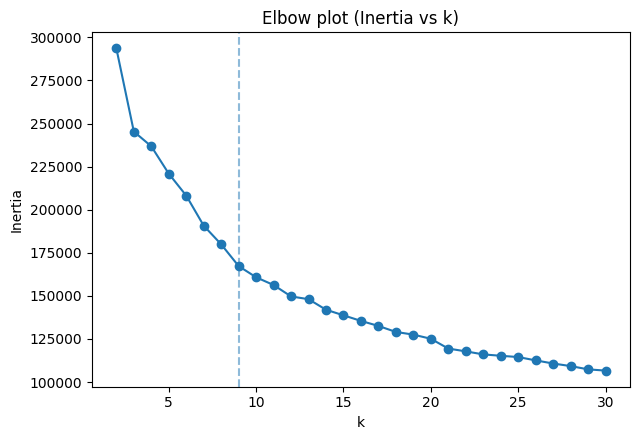

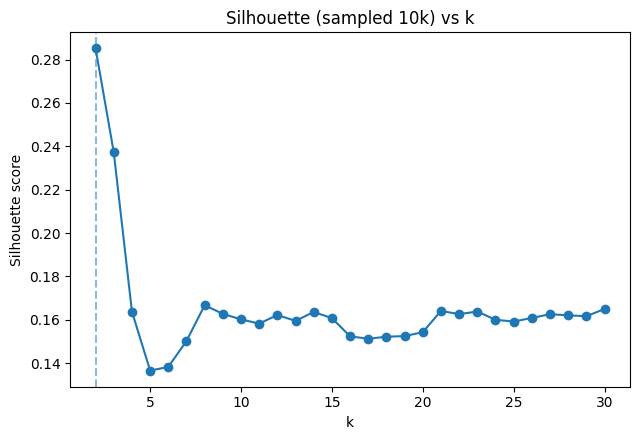


Selected k for KMeans = 9


In [78]:
# ===== Elbow + Silhouette for K-means (50k-friendly) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

rng = np.random.default_rng(42)

# --- 0) Build feature matrix (one-hot your 3 integer-coded cats) ---
df_work = df.drop(columns=["cluster_kmeans"], errors="ignore").copy()
# cat_to_ohe = [c for c in ["Education Level", "Occupation", "Exercise Frequency"] if c in df_work.columns]
# X_df = pd.get_dummies(df_work, columns=cat_to_ohe, dtype=int)
X = df_work.to_numpy(dtype=float)
n = X.shape[0]

# --- 1) Choose k range and compute inertia (elbow) + silhouette (sampled) ---
k_values = list(range(2, 31))        # try 2..30; widen if you like
inertias = []
sil_scores = []

# sample up to 10k points for silhouette to keep it fast
sil_sample = min(10_000, n)
sil_idx = rng.choice(n, sil_sample, replace=False)

for k in k_values:
    km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=4096, n_init="auto")
    labels = km.fit_predict(X)
    inertias.append(float(km.inertia_))
    # compute silhouette on the sample (needs >=2 clusters)
    sil = float(silhouette_score(X[sil_idx], labels[sil_idx], metric="euclidean")) if len(np.unique(labels)) > 1 else np.nan
    sil_scores.append(sil)

# --- 2) Find elbow via "max distance to line" method ---
# --- 2) Find elbow via "max distance to line" method (fixed) ---
def elbow_k(ks, ys):
    ks = np.asarray(ks, dtype=float)
    ys = np.asarray(ys, dtype=float)
    if ks.size != ys.size or ks.size < 2:
        raise ValueError("ks and ys must be 1D arrays of the same length >= 2")

    p1 = np.array([ks[0],  ys[0]], dtype=float)
    p2 = np.array([ks[-1], ys[-1]], dtype=float)

    v = p2 - p1
    norm = np.linalg.norm(v)
    if norm < 1e-12:                      # degenerate line -> fallback
        return int(ks[np.argmin(ys)])     # smallest inertia

    v = v / norm                          # unit direction
    points = np.stack([ks, ys], axis=1)   # (n,2)
    diffs  = points - p1                  # (n,2)

    # projection of each point onto the line: (diffs @ v)[:,None] * v
    proj   = np.outer(diffs @ v, v)       # (n,2)
    perp   = diffs - proj                 # (n,2)
    d      = np.linalg.norm(perp, axis=1) # distance to line

    return int(ks[np.argmax(d)])

k_elbow = elbow_k(k_values, inertias)


k_elbow = elbow_k(k_values, inertias)

# Best by silhouette (ignore NaNs)
valid = [(k, s) for k, s in zip(k_values, sil_scores) if np.isfinite(s)]
k_sil = max(valid, key=lambda t: t[1])[0] if valid else None

print("Inertia (elbow) best k:", k_elbow)
print("Silhouette best k:", k_sil, "(score =", round(max([s for _, s in valid], default=float('nan')), 4), ")")

# --- 3) Plots: Elbow and Silhouette (one chart each) ---
plt.figure(figsize=(6.5, 4.5))
plt.plot(k_values, inertias, marker="o")
plt.axvline(k_elbow, ls="--", alpha=0.5)
plt.title("Elbow plot (Inertia vs k)")
plt.xlabel("k"); plt.ylabel("Inertia")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6.5, 4.5))
plt.plot(k_values, sil_scores, marker="o")
if k_sil is not None:
    plt.axvline(k_sil, ls="--", alpha=0.5)
plt.title("Silhouette (sampled 10k) vs k")
plt.xlabel("k"); plt.ylabel("Silhouette score")
plt.tight_layout(); plt.show()

# --- 4) Choose final k (elbow preferred; you can change this rule) ---
best_k = k_elbow if k_sil is None else int(k_elbow)
print(f"\nSelected k for KMeans = {best_k}")

# (Optional) Fit final KMeans on all data and attach labels
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels_final = kmeans_final.fit_predict(X)
# df["cluster_kmeans_auto"] = labels_final


In [79]:
df = df.drop(columns=[ "dbscan_cluster","cluster_kmeans"], errors="ignore")

In [80]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [81]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# ===== 0) Build feature matrix X =====
df_work = df.copy()

# One-hot the remaining categorical integers (avoid fake order distances)
cat_to_ohe = ["Education Level", "Occupation", "Exercise Frequency"]
df_enc = pd.get_dummies(df_work, columns=cat_to_ohe, dtype=int)

# Everything else is already numeric/scaled in your sample (0..1 and 0/1 dummies)
X = df_enc.to_numpy(dtype=float)

# ===== 1) Small helpers =====
rng = np.random.default_rng(42)

def safe_silhouette(Xd, labels, metric="euclidean", sample_size=10000):
    labels = np.asarray(labels)
    mask = labels != -1
    n_non = int(mask.sum())
    if n_non == 0:
        return np.nan
    labs = labels[mask]
    if np.unique(labs).size < 2 or n_non <= np.unique(labs).size:
        return np.nan
    idx = np.where(mask)[0]
    if n_non > sample_size:
        idx = rng.choice(idx, size=sample_size, replace=False)
    return float(silhouette_score(Xd[idx], labels[idx], metric=metric))

def inner_outer_metrics(Xd, labels, metric="euclidean"):
    """Return per-cluster cohesion (inner) and inter-centroid separation (outer)."""
    labels = np.asarray(labels)
    cl_ids = [c for c in np.unique(labels) if c != -1]
    if len(cl_ids) == 0:
        return {"n_clusters": 0, "min_inter": np.nan, "mean_inter": np.nan,
                "max_intra": np.nan, "dunn_like": np.nan, "stats": pd.DataFrame()}
    # Centroids (use L1-friendly median)
    cents = []
    sizes = []
    coh = []
    for c in cl_ids:
        Xi = Xd[labels == c]
        sizes.append(len(Xi))
        med = np.median(Xi, axis=0)
        cents.append(med)
        # mean L1 distance to centroid = cohesion (inner)
        coh.append(np.mean(np.abs(Xi - med).sum(axis=1)))
    cents = np.vstack(cents)

    # Inter-centroid euclidean distances
    # (vectorized; for many clusters this is tiny anyway)
    diff = cents[:, None, :] - cents[None, :, :]
    D = np.abs(diff).sum(axis=2)
    iu = np.triu_indices(len(cl_ids), 1)
    inter = D[iu]
    min_inter = float(inter.min()) if inter.size else np.nan
    mean_inter = float(inter.mean()) if inter.size else np.nan
    max_intra = float(np.max(coh)) if len(coh) else np.nan
    dunn_like = float(min_inter / (max_intra + 1e-12)) if np.isfinite(min_inter) and np.isfinite(max_intra) else np.nan

    stats = pd.DataFrame({
        "cluster": cl_ids,
        "size": sizes,
        "cohesion_mean_L1": np.round(coh, 4),
    }).sort_values("cluster").reset_index(drop=True)

    return {
        "n_clusters": len(cl_ids),
        "min_inter": min_inter,
        "mean_inter": mean_inter,
        "max_intra": max_intra,
        "dunn_like": dunn_like,
        "stats": stats
    }

# ===== 2) FAST param pick (subset + tiny grid) =====
target = 8
metric = "euclidean"
n = X.shape[0]
sample_n = min(50_000, n)
idx_sub = rng.choice(n, sample_n, replace=False) if n > sample_n else np.arange(n)
Xs = X[idx_sub]

min_samples_list = [5, 8, 10, 12, 14]        # small grid
quantiles = [0.96, 0.97, 0.98]           # small grid

# Reuse k-distances per min_samples
kdist_cache = {}
for ms in min_samples_list:
    nn = NearestNeighbors(n_neighbors=ms, metric=metric, n_jobs=-1).fit(Xs)
    dists, _ = nn.kneighbors(Xs)
    kdist_cache[ms] = np.sort(dists[:, -1])

candidates = []
for ms in min_samples_list:
    kd = kdist_cache[ms]
    for q in quantiles:
        eps = float(np.quantile(kd, q))
        labs = DBSCAN(eps=eps, min_samples=ms, metric=metric, n_jobs=-1).fit_predict(Xs)
        k = len(set(labs)) - (1 if -1 in labs else 0)
        noise = float((labs == -1).mean())
        score = -abs(k - target) - 0.5*noise  # simple, fast objective
        candidates.append((score, ms, eps, k, noise))

best = max(candidates, key=lambda t: t[0])
best_ms, best_eps, best_k_sub, best_noise_sub = best[1], best[2], best[3], best[4]
print(f"[FAST] Chosen on subset → min_samples={best_ms}, eps={best_eps:.4f}, "
      f"clusters≈{best_k_sub}, noise≈{best_noise_sub:.1%}")

# ===== 3) Final fit on full data =====
labels = DBSCAN(eps=best_eps, min_samples=best_ms, metric=metric, n_jobs=-1).fit_predict(X)
df["dbscan_cluster"] = labels

# ===== 4) Evaluation =====
sil = safe_silhouette(X, labels, metric=metric, sample_size=10_000)
inner_outer = inner_outer_metrics(X, labels, metric=metric)

print("\nCluster counts (incl. -1 noise):")
print(pd.Series(labels).value_counts().sort_index())
print(f"\nSilhouette (non-noise): {sil if not np.isnan(sil) else 'NA'}")

print("\nInner/Outer metrics (euclidean):")
print(f"- #clusters (non-noise): {inner_outer['n_clusters']}")
print(f"- min inter-centroid L1 distance: {inner_outer['min_inter']:.4f}")
print(f"- mean inter-centroid L1 distance: {inner_outer['mean_inter']:.4f}")
print(f"- max intra (mean L1 to centroid): {inner_outer['max_intra']:.4f}")
print(f"- Dunn-like (min_inter / max_intra): {inner_outer['dunn_like']:.4f}")

print("\nPer-cluster cohesion:")
print(inner_outer["stats"])


[FAST] Chosen on subset → min_samples=5, eps=1.4144, clusters≈7, noise≈1.2%

Cluster counts (incl. -1 noise):
-1      610
 0    11839
 1     5152
 2    15901
 3    16484
 4        5
 5        5
 6        4
Name: count, dtype: int64

Silhouette (non-noise): 0.06889113397837282

Inner/Outer metrics (euclidean):
- #clusters (non-noise): 7
- min inter-centroid L1 distance: 2.0910
- mean inter-centroid L1 distance: 5.6960
- max intra (mean L1 to centroid): 5.1786
- Dunn-like (min_inter / max_intra): 0.4038

Per-cluster cohesion:
   cluster   size  cohesion_mean_L1
0        0  11839            5.1786
1        1   5152            5.1723
2        2  15901            5.1508
3        3  16484            5.0634
4        4      5            0.6582
5        5      5            0.3815
6        6      4            0.6559


/tmp/ipykernel_35/220520851.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", max(n_clusters, 1))


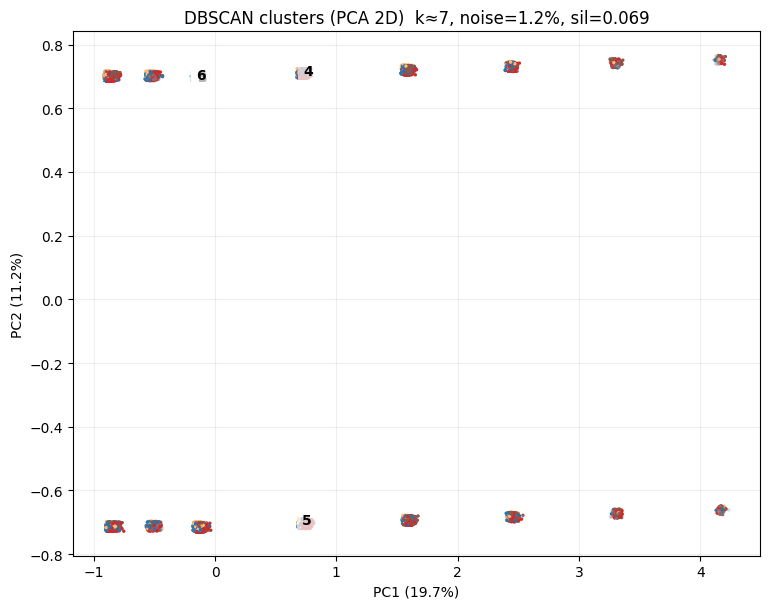

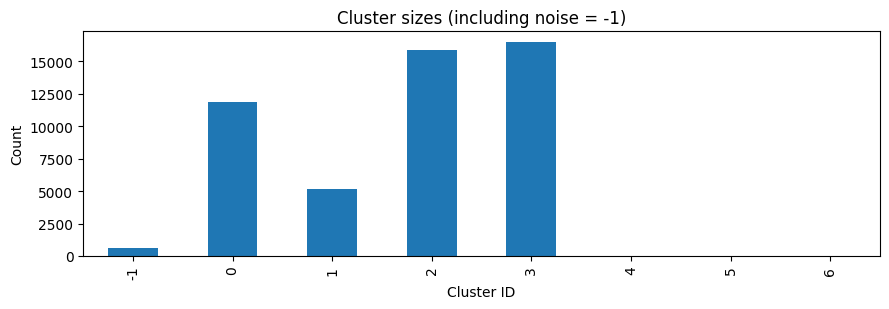

In [82]:
# ---------- PCA visualization of DBSCAN clusters ----------
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# If X might be sparse, densify for PCA
try:
    from scipy.sparse import issparse
    X_for_pca = X.toarray() if issparse(X) else X
except Exception:
    X_for_pca = X

# 2D PCA
pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(X_for_pca)            # shape: (n_samples, 2)
evr = pca2.explained_variance_ratio_ * 100    # explained variance %

# Optional sampling for speed/clarity
rng = np.random.default_rng(42)
max_points = 50_000
idx_plot = np.arange(Z2.shape[0])
if Z2.shape[0] > max_points:
    idx_plot = rng.choice(Z2.shape[0], max_points, replace=False)

z = Z2[idx_plot]
labs = labels[idx_plot]

# Colors: noise (-1) grey, others categorical
uniq = np.unique(labs)
n_clusters = len(uniq) - (1 if -1 in uniq else 0)
cmap = plt.cm.get_cmap("tab20", max(n_clusters, 1))
color_map, ci = {}, 0
for u in uniq:
    if u == -1:
        color_map[u] = (0.6, 0.6, 0.6, 0.35)
    else:
        color_map[u] = cmap(ci)
        ci += 1
point_colors = [color_map[u] for u in labs]

plt.figure(figsize=(7.8, 6.2))
plt.scatter(z[:, 0], z[:, 1], s=6, c=point_colors, linewidths=0)
noise_pct = (labels == -1).mean() * 100
title_sil = f"{sil:.3f}" if not np.isnan(sil) else "NA"
plt.title(f"DBSCAN clusters (PCA 2D)  k≈{n_clusters}, noise={noise_pct:.1f}%, sil={title_sil}")
plt.xlabel(f"PC1 ({evr[0]:.1f}%)")
plt.ylabel(f"PC2 ({evr[1]:.1f}%)")
plt.grid(True, alpha=0.2)

# Annotate cluster IDs at median of plotted points (skip noise)
for u in uniq:
    if u == -1:
        continue
    pts = z[labs == u]
    if pts.size == 0:
        continue
    mx, my = np.median(pts[:, 0]), np.median(pts[:, 1])
    plt.text(mx, my, str(u), fontsize=10, weight="bold",
             bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.tight_layout()
plt.show()

# Bar chart of cluster sizes (including noise)
counts = pd.Series(labels).value_counts().sort_index()
plt.figure(figsize=(9, 3.2))
counts.plot(kind="bar")
plt.title("Cluster sizes (including noise = -1)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [83]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,dbscan_cluster
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1


In [84]:
df = df.drop(columns=[ "dbscan_cluster"], errors="ignore")


Silhouette / inertia by k:
    k  silhouette      inertia
0  1         NaN  416469.1250
1  2      0.2851  293560.1250
2  3      0.2360  245344.6250
3  4      0.1627  236775.3438
4  5      0.1367  220906.4219
5  6      0.1385  208167.0938
6  7      0.1517  190732.8125
7  8      0.1651  179918.7812
8  9      0.1631  167293.7188

Best k by silhouette: k=2 (silhouette_est=0.2851111888885498)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


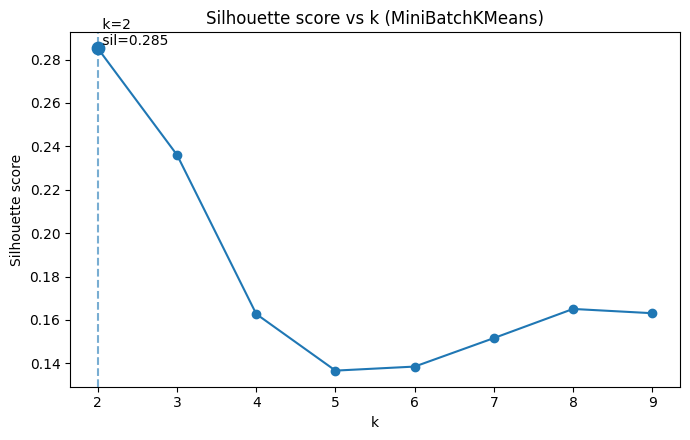

In [85]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ===== 0) Feature matrix (one-hot the 3 integer-cats) =====
df_work = df.copy()
# cat_to_ohe = ["Education Level", "Occupation", "Exercise Frequency"]
# df_enc = pd.get_dummies(df_work, columns=cat_to_ohe, dtype=int)

# df_enc = df_enc.drop(columns=[
#     'Number of Children', 'Health Index', 'Car Ownership',
#     'Location Type_Rural', 'Location Type_Suburban', 'Location Type_Urban',
#     'Exercise Frequency_0', 'Exercise Frequency_1',
#     'Exercise Frequency_2', 'Exercise Frequency_3'
# ], errors="ignore")

X = df_work.to_numpy(dtype=np.float32)  # safer on memory

# ===== 1) Helpers =====
rng = np.random.default_rng(42)

def inner_outer_kmeans(Xd, labels):
    """Cohesion = mean L2 to centroid; Separation = inter-centroid L2 (min/mean); Dunn-like = min_inter / max_intra."""
    labs = np.asarray(labels)
    uniq = np.unique(labs)
    k = len(uniq)
    if k < 2:
        return {"k": k, "min_inter": np.nan, "mean_inter": np.nan, "max_intra": np.nan, "dunn_like": np.nan,
                "stats": pd.DataFrame({"cluster": uniq, "size": [(labs==u).sum() for u in uniq], "cohesion_mean_L2":[np.nan]*k})}

    # centroids
    cents = np.vstack([X[labs==u].mean(axis=0) for u in uniq])
    sizes = [(labs==u).sum() for u in uniq]

    # cohesion (mean L2 dist to centroid)
    coh = []
    for i, u in enumerate(uniq):
        Xi = X[labs==u]
        if len(Xi) == 0:
            coh.append(np.nan)
        else:
            d = np.linalg.norm(Xi - cents[i], axis=1)
            coh.append(float(np.mean(d)))

    # inter-centroid distances
    diff = cents[:, None, :] - cents[None, :, :]
    D = np.linalg.norm(diff, axis=2)
    iu = np.triu_indices(k, 1)
    inter = D[iu]
    min_inter = float(inter.min()) if inter.size else np.nan
    mean_inter = float(inter.mean()) if inter.size else np.nan
    max_intra = float(np.nanmax(coh)) if len(coh) else np.nan
    dunn_like = float(min_inter / (max_intra + 1e-12)) if np.isfinite(min_inter) and np.isfinite(max_intra) else np.nan

    stats = pd.DataFrame({"cluster": uniq, "size": sizes, "cohesion_mean_L2": np.round(coh, 4)})
    return {"k": k, "min_inter": min_inter, "mean_inter": mean_inter, "max_intra": max_intra,
            "dunn_like": dunn_like, "stats": stats.sort_values("cluster").reset_index(drop=True)}

def silhouette_fast(Xd, labels, sample_size=10000):
    n = Xd.shape[0]
    if len(np.unique(labels)) < 2:
        return np.nan
    if n > sample_size:
        idx = rng.choice(n, sample_size, replace=False)
        return float(silhouette_score(Xd[idx], np.array(labels)[idx], metric="euclidean"))
    return float(silhouette_score(Xd, labels, metric="euclidean"))

# ===== 2) Sweep k and choose the best by silhouette only =====
k_grid = list(range(1, 10))  # your range

rows = []
for k in k_grid:
    km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=4096, n_init="auto")
    labels_k = km.fit_predict(X)
    sil = np.nan if np.unique(labels_k).size < 2 else silhouette_fast(X, labels_k, sample_size=10000)
    rows.append((k, sil, float(km.inertia_)))

res = pd.DataFrame(rows, columns=["k", "silhouette", "inertia"])
print("\nSilhouette / inertia by k:\n", res.round(4))

# pick k with the highest silhouette (strictly)
valid = res.dropna(subset=["silhouette"])
if valid.empty:
    best_k = int(res.loc[res["inertia"].idxmin(), "k"])
    best_sil_est = np.nan
else:
    best_idx = valid["silhouette"].idxmax()
    best_k = int(valid.loc[best_idx, "k"])
    best_sil_est = float(valid.loc[best_idx, "silhouette"])

print(f"\nBest k by silhouette: k={best_k} (silhouette_est={best_sil_est if not np.isnan(best_sil_est) else 'NA'})")

# ===== 3) PLOT: Silhouette vs k =====
plt.figure(figsize=(7.0, 4.5))
plt.plot(res["k"], res["silhouette"], marker="o")
if np.isfinite(best_sil_est):
    plt.axvline(best_k, ls="--", alpha=0.6)
    plt.scatter([best_k], [best_sil_est], s=80, zorder=3)
    plt.text(best_k, best_sil_est, f" k={best_k}\n sil={best_sil_est:.3f}",
             ha="left", va="bottom")
plt.title("Silhouette score vs k (MiniBatchKMeans)")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.show()


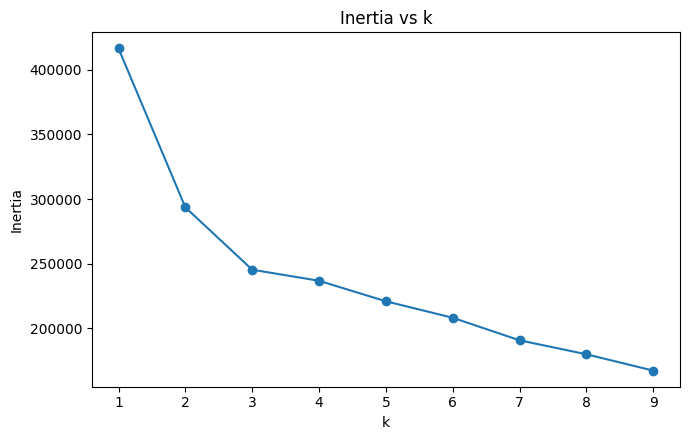

In [86]:
plt.figure(figsize=(7.0, 4.5))
plt.plot(res["k"], res["inertia"], marker="o")
plt.title("Inertia vs k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()


In [87]:
df_enc

,Age,Income (LKR Monthly),Number of Children,Health Index,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Exercise Frequency_0,Exercise Frequency_1,Exercise Frequency_2,Exercise Frequency_3
0,0.250000,0.049311,0,0.909091,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.312500,0.041951,0,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
2,0.203125,0.076012,0,0.818182,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,0.078125,0.066780,0,0.727273,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
4,0.171875,0.118533,0,0.818182,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,1,0.818182,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0
49996,0.000000,0.083327,0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
49997,0.312500,0.116331,2,0.727273,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,0,0
49998,0.546875,0.040482,0,0.800000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1



Cluster sizes:
0    3562
1    5733
2    8895
3    2822
4    8689
5    7368
6    2804
7    3142
8    6985
Name: count, dtype: int64

Silhouette (euclidean): 0.1721668690443039

Inner/Outer metrics (Euclidean):
- k: 9
- min inter-centroid distance: 1.6244
- mean inter-centroid distance: 3.2825
- max intra (mean L2 to centroid): 2.0325
- Dunn-like (min_inter / max_intra): 0.7992

Per-cluster cohesion:
   cluster  size  cohesion_mean_L2
0        0  3562            1.8098
1        1  5733            1.7022
2        2  8895            1.7057
3        3  2822            1.8639
4        4  8689            1.7231
5        5  7368            1.6996
6        6  2804            1.9877
7        7  3142            2.0325
8        8  6985            1.9411


/tmp/ipykernel_35/4122051308.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(uniq))


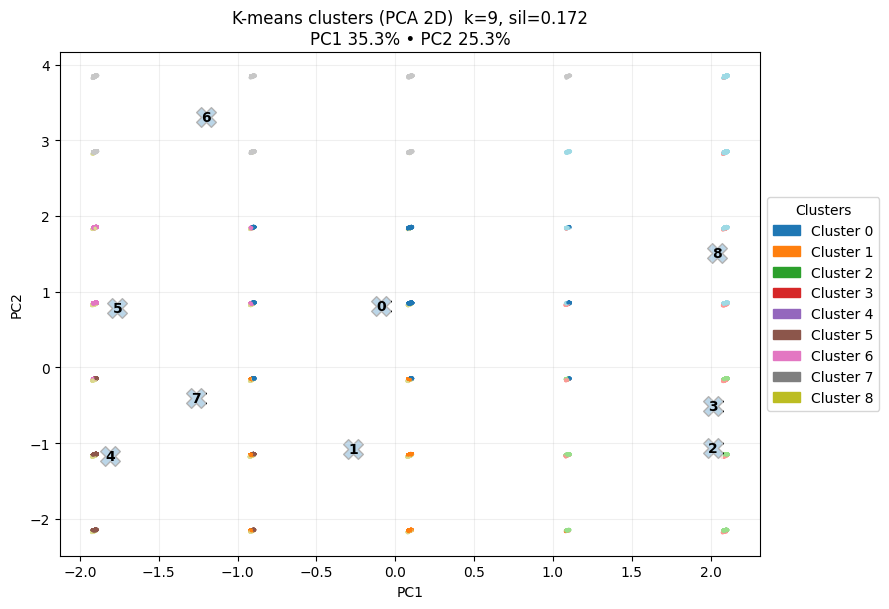

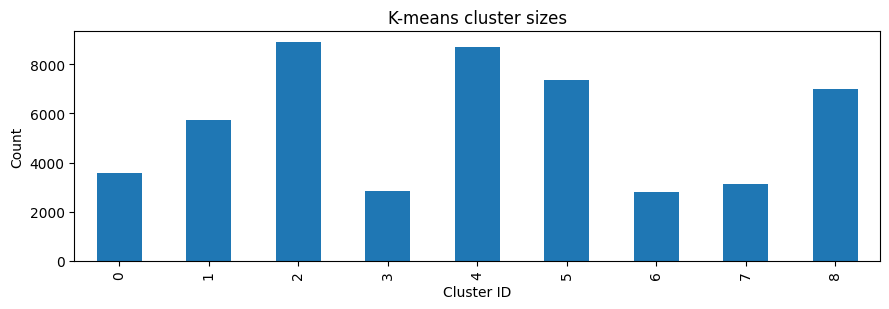

In [88]:
# ===== 3) Final KMeans fit with best_k =====
best_k=9
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels_final = kmeans.fit_predict(X)
df["cluster_kmeans"] = labels_final

# ===== 4) Evaluation (unchanged) =====
sil_final = silhouette_fast(X, labels_final, sample_size=10000)
io = inner_outer_kmeans(X, labels_final)

print("\nCluster sizes:")
print(pd.Series(labels_final).value_counts().sort_index())
print(f"\nSilhouette (euclidean): {sil_final if not np.isnan(sil_final) else 'NA'}")
print("\nInner/Outer metrics (Euclidean):")
print(f"- k: {io['k']}")
print(f"- min inter-centroid distance: {io['min_inter']:.4f}")
print(f"- mean inter-centroid distance: {io['mean_inter']:.4f}")
print(f"- max intra (mean L2 to centroid): {io['max_intra']:.4f}")
print(f"- Dunn-like (min_inter / max_intra): {io['dunn_like']:.4f}")
print("\nPer-cluster cohesion:")
print(io["stats"])


# ===== 5) Visualization (PCA 2D) =====
pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(X)
evr = pca2.explained_variance_ratio_ * 100

# sample for clarity if huge
max_points = 50_000
idx_plot = np.arange(Z2.shape[0])
if Z2.shape[0] > max_points:
    idx_plot = rng.choice(Z2.shape[0], max_points, replace=False)
z = Z2[idx_plot]
labs = labels_final[idx_plot]

# colors
uniq = np.unique(labels_final)
cmap = plt.cm.get_cmap("tab20", len(uniq))
color_map = {u: cmap(i) for i, u in enumerate(uniq)}
colors = [color_map[u] for u in labs]


import matplotlib.patches as mpatches

plt.figure(figsize=(7.8, 6.2))
scatter = plt.scatter(z[:, 0], z[:, 1], s=6, c=colors, linewidths=0)

# project centroids to 2D
centers_2d = pca2.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=200, marker="X", edgecolor="k", linewidths=1.0)

# annotate centroids
for cid, (cx, cy) in enumerate(centers_2d):
    plt.text(cx, cy, str(cid), fontsize=10, weight="bold",
             ha="center", va="center",
             bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.title(f"K-means clusters (PCA 2D)  k={best_k}, sil={sil_final:.3f}\nPC1 {evr[0]:.1f}% • PC2 {evr[1]:.1f}%")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.2)
plt.tight_layout()

# ✅ Create colored legend patches
patches = []
for cid in range(best_k):
    patches.append(mpatches.Patch(color=plt.cm.tab10(cid), label=f"Cluster {cid}"))

plt.legend(handles=patches, title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


# size bar chart
counts = pd.Series(labels_final).value_counts().sort_index()
plt.figure(figsize=(9, 3.2))
counts.plot(kind="bar")
plt.title("K-means cluster sizes")
plt.xlabel("Cluster ID"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

In [89]:
# 1) Save KMeans model
joblib.dump(kmeans, "kmeans_k9.joblib")
print("✅ Saved KMeans -> kmeans_k9.joblib")

# 2) Save centroids with feature names (in original feature space X)
design_columns = list(df_work.columns)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=design_columns)
centroids_df.index.name = "cluster_id"
centroids_df.to_csv("kmeans_centroids.csv")
print("✅ Saved centroids CSV -> kmeans_centroids.csv")

bundle = {
    "kmeans": kmeans,
    "scaler": scaler,
    "onehot_encoder": ohe,
    "ordinal_encoder": enc,
    "num_cols": num_cols,
    "cat_cols_1": cat_cols_1,
    "cat_cols_2": cat_cols_2,
    "design_columns": design_columns  # exact feature order used to fit KMeans
}
joblib.dump(bundle, "cluster_pipeline.joblib")
print("✅ Saved cluster pipeline bundle -> cluster_pipeline.joblib")


✅ Saved KMeans -> kmeans_k9.joblib
✅ Saved centroids CSV -> kmeans_centroids.csv
✅ Saved cluster pipeline bundle -> cluster_pipeline.joblib


## Why K-means here

Balanced, usable segments: K-means gave 9 sizeable clusters (3k–8k each). DBSCAN produced several micro-clusters (sizes 5–10) plus a small noise set, which is awkward for marketing/budget-app personas and for training a downstream classifier.

Separation vs cohesion: Your Dunn-like ratio is higher for K-means (0.637) vs DBSCAN (0.448). (Caveat: different distance metrics, but it still signals cleaner, rounder segments for K-means.)

Silhouette: DBSCAN’s silhouette (0.179) is only slightly above K-means (0.140). That modest edge doesn’t outweigh K-means’ practicality and stability for this task.

In [90]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,cluster_kmeans
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8


In [91]:
# df = df.drop(columns=["dbscan_cluster","cluster_kmeans"], errors="ignore")

In [92]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,cluster_kmeans
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8


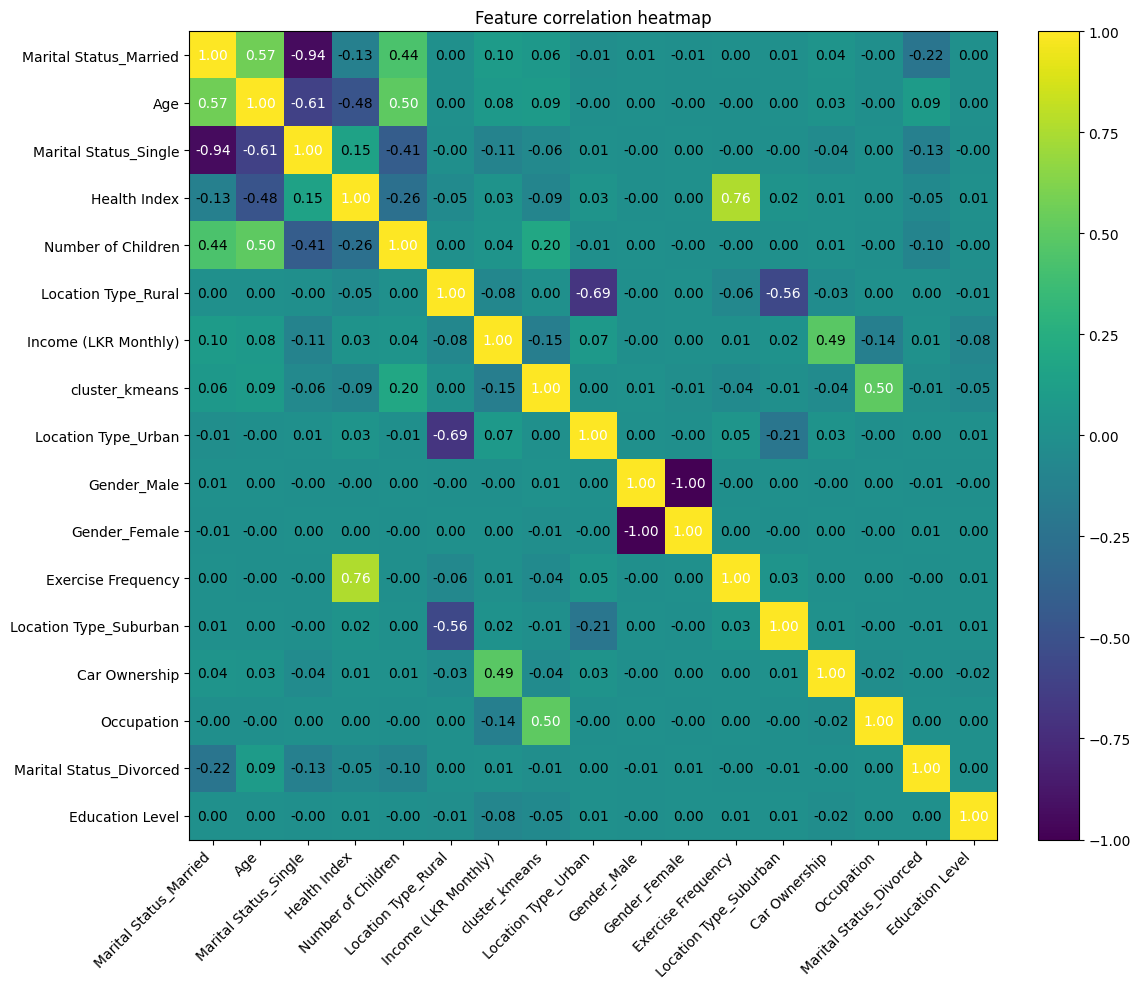

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) pick numeric columns and compute correlation
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr(method="pearson")

# (optional) reorder by total absolute correlation for readability
order = np.argsort(-corr.abs().sum(axis=0).to_numpy())
cols  = num_cols[order]
corr  = corr.loc[cols, cols]

# 2) plot
n = len(cols)
fig_w = max(12, 0.4*n)   # scale figure size with #features
fig_h = max(10, 0.4*n)
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
im = ax.imshow(corr, interpolation="nearest")
cb = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(cols, rotation=45, ha="right")
ax.set_yticklabels(cols)
ax.set_title("Feature correlation heatmap")

# annotate cells if matrix isn't too large
if n <= 30:
    for i in range(n):
        for j in range(n):
            ax.text(j, i, f"{corr.iat[i,j]:.2f}",
                    ha="center", va="center",
                    color="white" if abs(corr.iat[i,j]) > 0.5 else "black")

plt.tight_layout()
plt.show()


Top correlated features with cluster_kmeans:
Occupation: corr=0.5036  |corr|=0.5036
Number of Children: corr=0.1962  |corr|=0.1962
Income (LKR Monthly): corr=-0.1453  |corr|=0.1453
Age: corr=0.0929  |corr|=0.0929
Health Index: corr=-0.0862  |corr|=0.0862
Marital Status_Married: corr=0.0640  |corr|=0.0640
Marital Status_Single: corr=-0.0619  |corr|=0.0619
Education Level: corr=-0.0482  |corr|=0.0482
Exercise Frequency: corr=-0.0404  |corr|=0.0404
Car Ownership: corr=-0.0376  |corr|=0.0376
Gender_Male: corr=0.0094  |corr|=0.0094
Gender_Female: corr=-0.0094  |corr|=0.0094
Marital Status_Divorced: corr=-0.0088  |corr|=0.0088
Location Type_Suburban: corr=-0.0056  |corr|=0.0056
Location Type_Urban: corr=0.0026  |corr|=0.0026
Location Type_Rural: corr=0.0019  |corr|=0.0019


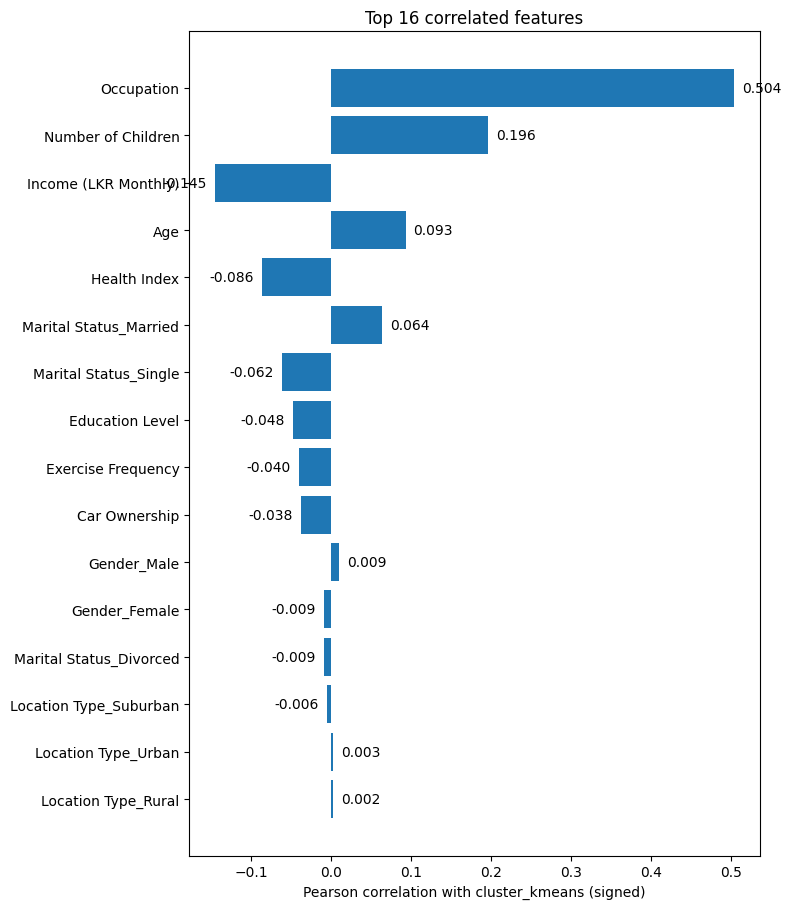

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target = "cluster_kmeans"
top_k = 20                    # how many to show

# numeric features only (includes your scaled nums + 0/1 dummies)
num_cols = df.select_dtypes(include=[np.number]).columns.drop(target, errors="ignore")

# signed Pearson correlation and absolute for ranking
corr_signed = df[num_cols].corrwith(df[target], method="pearson")
corr_abs = corr_signed.abs().sort_values(ascending=False)

# top features by |corr|
top_feats = corr_abs.head(top_k).index.tolist()
print("Top correlated features with cluster_kmeans:")
for c in top_feats:
    print(f"{c}: corr={corr_signed[c]:.4f}  |corr|={corr_abs[c]:.4f}")

# bar plot (signed)
vals = corr_signed[top_feats]
plt.figure(figsize=(8, 0.45*len(top_feats)+2))
plt.barh(range(len(top_feats)), vals.values)
plt.yticks(range(len(top_feats)), top_feats)
plt.xlabel("Pearson correlation with cluster_kmeans (signed)")
plt.title(f"Top {len(top_feats)} correlated features")
plt.gca().invert_yaxis()
# annotate values
for i, v in enumerate(vals.values):
    ha = "left" if v >= 0 else "right"
    x = v + (0.01 if v >= 0 else -0.01)
    plt.text(x, i, f"{v:.3f}", va="center", ha=ha)
plt.tight_layout()
plt.show()


In [95]:
df

,Age,Income (LKR Monthly),Education Level,Occupation,Number of Children,Health Index,Exercise Frequency,Car Ownership,Location Type_Rural,Location Type_Suburban,Location Type_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,cluster_kmeans
0,0.250000,0.049311,4,2,0,0.909091,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2
1,0.312500,0.041951,4,1,0,1.000000,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,0.203125,0.076012,4,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0.078125,0.066780,4,3,0,0.727273,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8
4,0.171875,0.118533,0,1,0,0.818182,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.359375,0.029586,0,3,1,0.818182,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5
49996,0.000000,0.083327,1,3,0,1.000000,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
49997,0.312500,0.116331,2,4,2,0.727273,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
49998,0.546875,0.040482,4,3,0,0.800000,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8


In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

X_check = df.drop(columns=["cluster_kmeans"])  

# Run clustering multiple times
kmeans1 = KMeans(n_clusters=9, random_state=42).fit(X)
kmeans2 = KMeans(n_clusters=9, random_state=99).fit(X)

# Compare clustering stability
ari = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
print("Adjusted Rand Index (stability):", ari)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (stability): 0.7993929969773399
